<a href="https://colab.research.google.com/github/Shoaib777/Machine_Learning-ML/blob/main/Supervised_and_Unsupervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This artical is about the Car Pricing Predication and car Clustering Problems solution mannual using Supervised and Unsupervised Machine Learning technics.  The dataset is available on my Personal Drive, We have two dataset. Kindly download Both Datasets Name "Car_dataset_Labeled.csv" and the other one is "car_dataset_Unlabeled.csv".


In [ ]:
#We add the Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Now we are going to load our dataset

In [ ]:
car = pd.read_csv("/content/Car_dataset_Labeled.csv")
df = car.copy()
df.head().style.background_gradient(cmap = "autumn")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000


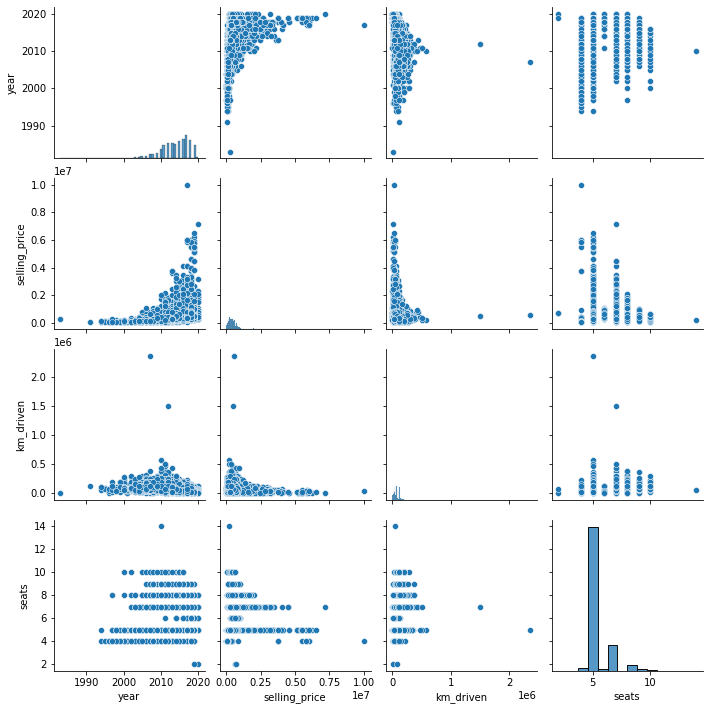

In [ ]:
sns.pairplot(car)

#Check shape (Rows and columns)

In [ ]:
car.shape

(8128, 13)

#DataSet Information and datatypes

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
display(car.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


#Check the null values of Dataset

In [ ]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#Data **Cleaning**

#To remove that features (Columns)  which are not essitenial for us

In [ ]:
df2=df.drop(df.columns[[8,9,10,11]], axis = 1)
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0


#To make The car "name" only to remove the special characters because for Good predication

In [ ]:
df2["Car_Brand"] = df2["name"].str.extract('([^\s]+)')
df2["Car_Brand"] = df2["Car_Brand"].astype("category")
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti


#Now to remove the 'Name' column Because we will add the 'Car_brand' at the end

In [ ]:
df2.drop(["name"], axis = 1, inplace = True)

df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti


#Again check for the Null_Values and Remove them by taking "Medine" to remove error values

In [ ]:
df2.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
seats            221
Car_Brand          0
dtype: int64

<Figure size 720x360 with 0 Axes>

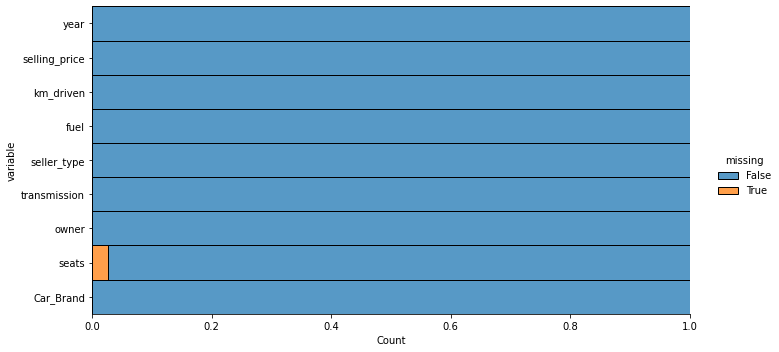

In [ ]:
# visualize missing values with seaborn (distplot)

plt.figure(figsize = (10, 5))
sns.displot(
    data = df2.isna().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 2
);

In [ ]:
median = df2['seats'].median()
print(median)
df2['seats'].fillna(median, inplace=True)

5.0


In [ ]:
df2.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
Car_Brand        0
dtype: int64

#Add Car age column (Car how many years is run)

In [ ]:
df2["Current_Year"]=2023
df2["Car_age"]=df2["Current_Year"]-df2["year"]
df2=df2.drop(["Current_Year","year"],axis=1)
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Brand,Car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,13
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16


In [ ]:
df2.describe()

,selling_price,km_driven,seats,Car_age
count,8.128000e+03,8.128000e+03,8128.000000,8128.000000
mean,6.382718e+05,6.981951e+04,5.405389,9.195989
std,8.062534e+05,5.655055e+04,0.948874,4.044249
min,2.999900e+04,1.000000e+00,2.000000,3.000000
25%,2.549990e+05,3.500000e+04,5.000000,6.000000
50%,4.500000e+05,6.000000e+04,5.000000,8.000000
75%,6.750000e+05,9.800000e+04,5.000000,12.000000
max,1.000000e+07,2.360457e+06,14.000000,40.000000


Catagorical values in a dataframe

In [ ]:
df2.columns


Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'seats', 'Car_Brand', 'Car_age'],
      dtype='object')

In [ ]:
df2['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [ ]:
df2['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [ ]:
df2['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [ ]:
df2['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

#To Visulize the data

In [ ]:
fuel = df2['fuel']
seller_type = df2['seller_type']
transmission = df2['transmission']
selling_price = df2['selling_price']

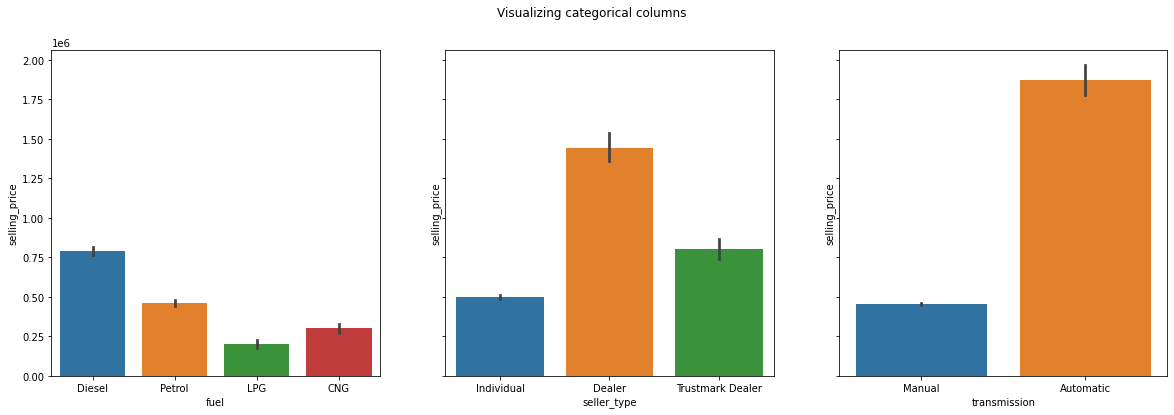

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,6), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission, y=selling_price, ax=axes[2])


#Encoding manual
#And also By one hot encoding

In [ ]:
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Brand,Car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,13
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16


#To change all data in Integer form

In [ ]:
df2.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)
df2.replace({'seller_type':{'Individual':0,'Dealer ':1,'Trustmark Dealer':2}},inplace=True)
df2.replace({'transmission':{'Manual':0,'Automatic ':1}},inplace=True)
df2.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2}},inplace=True)
df2.head()


,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Brand,Car_age
0,450000,145500,1,0,0,0,5.0,Maruti,9
1,370000,120000,1,0,0,1,5.0,Skoda,9
2,158000,140000,0,0,0,2,5.0,Honda,17
3,225000,127000,1,0,0,0,5.0,Hyundai,13
4,130000,120000,0,0,0,0,5.0,Maruti,16


In [ ]:
df2=pd.get_dummies(df2,drop_first=True)
df2.dtypes

selling_price                   int64
km_driven                       int64
fuel                            int64
seats                         float64
Car_age                         int64
seller_type_2                   uint8
seller_type_Dealer              uint8
transmission_Automatic          uint8
owner_1                         uint8
owner_2                         uint8
owner_Fourth & Above Owner      uint8
owner_Test Drive Car            uint8
Car_Brand_Ashok                 uint8
Car_Brand_Audi                  uint8
Car_Brand_BMW                   uint8
Car_Brand_Chevrolet             uint8
Car_Brand_Daewoo                uint8
Car_Brand_Datsun                uint8
Car_Brand_Fiat                  uint8
Car_Brand_Force                 uint8
Car_Brand_Ford                  uint8
Car_Brand_Honda                 uint8
Car_Brand_Hyundai               uint8
Car_Brand_Isuzu                 uint8
Car_Brand_Jaguar                uint8
Car_Brand_Jeep                  uint8
Car_Brand_Ki

#To splite data into Traing and Testing 

In [ ]:
from sklearn.model_selection import train_test_split 
 
X = df2.drop('selling_price', 1) 
Y = df2.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100) 

<ipython-input-89-a83c3e1a1f00>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('selling_price', 1)


#Supervised Machine Learning Algorithms

#Apply Linear Regression
-----------------------------

In [ ]:
from sklearn import linear_model 
from sklearn.metrics import r2_score 
 
lm = linear_model.LinearRegression() 
lm.fit(X_train, y_train) 
y_pred = lm.predict(X_test) 
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8218106667676945


#Lasso_linear_regression model
-----------------------------------

In [ ]:
# loading the lasso_linear_regression model
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()

lass_reg_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.401e+14, tolerance: 3.596e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.810758542050062


#Gaussian Naive Bayes
---------------------




In [ ]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [ ]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB()

In [ ]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 5.535055350553505


In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
print(model)


XGBClassifier(objective='multi:softprob')


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 13.78%


--------------------------------------------------------------------

#Un-supervised Machine Learning Algorithm

## Regression with unsupervised learning
--------------------------------------------------

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Read data into a dataframe
df = pd.read_csv('/content/car_dataset_Unlabeled.csv').reset_index()
df.head()

,index,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
0,0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [ ]:
df=df[['2014',	'450000',	'145500',	'Diesel',	'Individual',	'Manual']]
df.head()

,2014,450000,145500,Diesel,Individual,Manual
0,2014,370000,120000,Diesel,Individual,Manual
1,2006,158000,140000,Petrol,Individual,Manual
2,2010,225000,127000,Diesel,Individual,Manual
3,2007,130000,120000,Petrol,Individual,Manual
4,2017,440000,45000,Petrol,Individual,Manual


In [ ]:
df[df.select_dtypes('object').columns]=df[df.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
df.head()

,2014,450000,145500,Diesel,Individual,Manual
0,2014,370000,120000,1,1,1
1,2006,158000,140000,3,1,1
2,2010,225000,127000,1,1,1
3,2007,130000,120000,3,1,1
4,2017,440000,45000,3,1,1


In [ ]:
df.dtypes

2014          int64
450000        int64
145500        int64
Diesel        int64
Individual    int64
Manual        int64
dtype: object

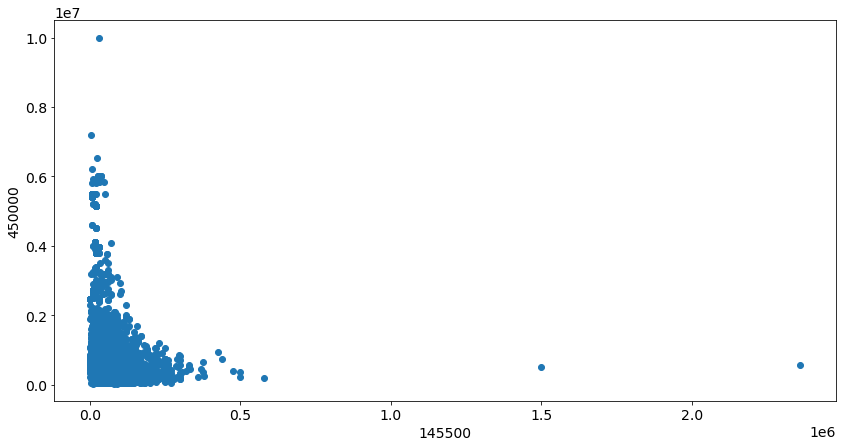

In [ ]:
# Defining Dependent and Independant variable
X = df.drop(columns=['450000']).values
Y = df['450000'].values

# Plotting the Clusters using matplotlib
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=14)

plt.scatter(df['145500'],df['450000'],label="cluster")
plt.xlabel("145500")
plt.ylabel("450000")
plt.show()

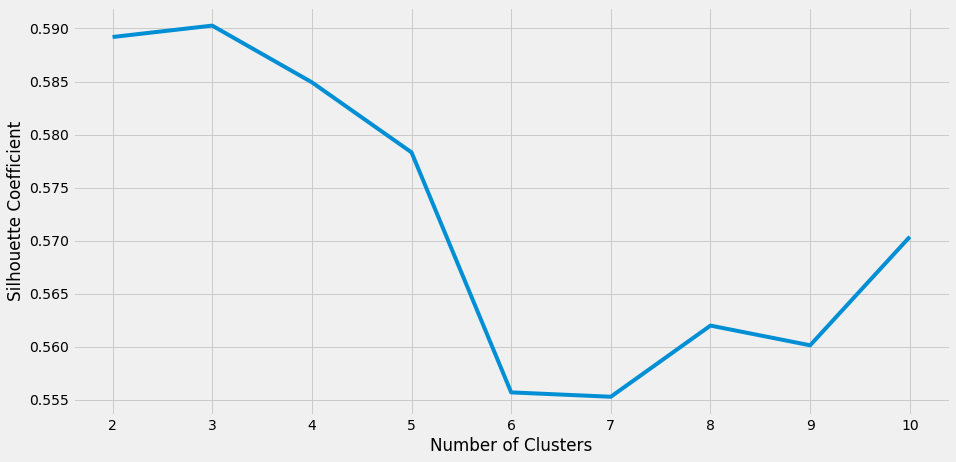

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
silhouette_coefficients = []
kmeans_kwargs= {"init":"random","n_init":10,"max_iter":300,"random_state":42}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

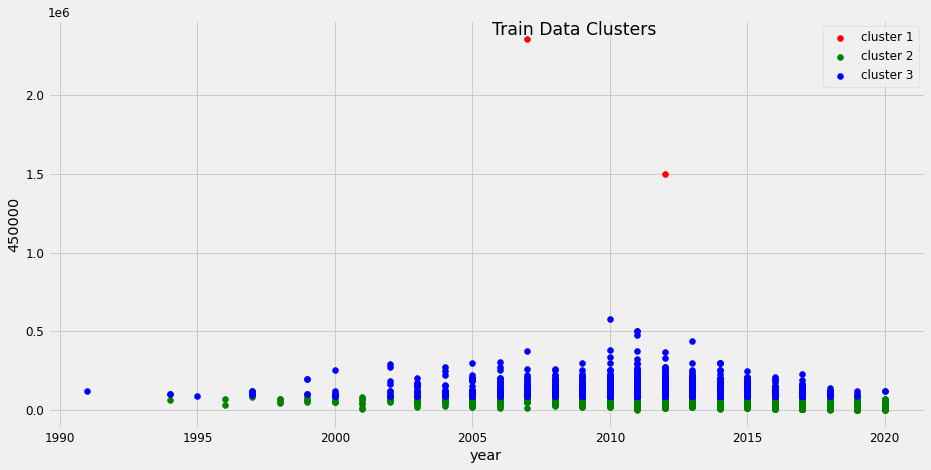

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Instantiate the model: KMeans from sklearn
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
# Fit to the training data
kmeans.fit(X_train)
train_df = pd.DataFrame(X_train,columns=df.drop(columns=['450000']).columns)
# Generate out clusters
train_cluster = kmeans.predict(X_train)
# Add the target and predicted clusters to our training DataFrame
train_df.insert(2,'Y house price of unit area',Y_train) 
train_df.insert(3,'cluster',train_cluster) 
n_clusters=3
train_clusters_df = []
for i in range(n_clusters):
    train_clusters_df.append(train_df[train_df['cluster']==i])
    
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=12)

# Plot X_train again with features labeled by cluster
for i in range(n_clusters):
  subset = []
  for count,row in enumerate(X_train):
      if(train_cluster[count]==i):
        subset.append(row)

  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label="cluster "+ str(i+1))
plt.title("Train Data Clusters", x=0.6, y=0.95)
plt.xlabel("year")
plt.ylabel("450000")
plt.legend()
plt.show()

#Building SVR Model for Each Cluster

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

n_clusters=3
cluster_svr = []
model = SVR(kernel='rbf', C=1000, epsilon=1)

for i in range(n_clusters):
    cluster_X = np.array((train_clusters_df[i])[df.drop(columns=['450000']).columns])
    cluster_Y = (train_clusters_df[i])['Y house price of unit area'].values
    cluster_svr.append(model.fit(cluster_X, cluster_Y))

In [ ]:
def regression_function(arr, kmeans, cluster_svr):
    result = []
    clusters_pred = kmeans.predict(arr)
    for i,data in enumerate(arr):
        result.append(((cluster_svr[clusters_pred[i]]).predict([data]))[0])
    return result

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# calculating Y value and cluster
Y_svr_k_means_pred = regression_function(X_test,kmeans, cluster_svr)
    



In [ ]:
import pandas as pd

result_df = pd.DataFrame(X_test,columns=df.drop(columns=['450000']).columns)
result_df['Y true value'] =  Y_test
result_df['Y SVR + K means'] = Y_svr_k_means_pred
result_df.head()

,2014,145500,Diesel,Individual,Manual,Y true value,Y SVR + K means
0,2001,71000,3,1,1,60000,337515.980117
1,2014,291977,1,1,1,500000,346103.788113
2,2016,70000,1,1,1,425000,337536.032722
3,2006,120000,3,1,1,150000,336917.222776
4,2012,74000,1,1,1,550000,337457.394875


In [ ]:
from sklearn.metrics import r2_score 
r2_score(result_df['Y true value'],result_df['Y SVR + K means'])

-0.12833150889151845

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f'MSE: {mean_squared_error(result_df["Y true value"],result_df["Y SVR + K means"])}')

MSE: 858394624232.7618


In [ ]:
print(f'MAE: {mean_absolute_error(result_df["Y true value"],result_df["Y SVR + K means"])}')

MAE: 412264.32142134866


##  Using SVR + KMeans

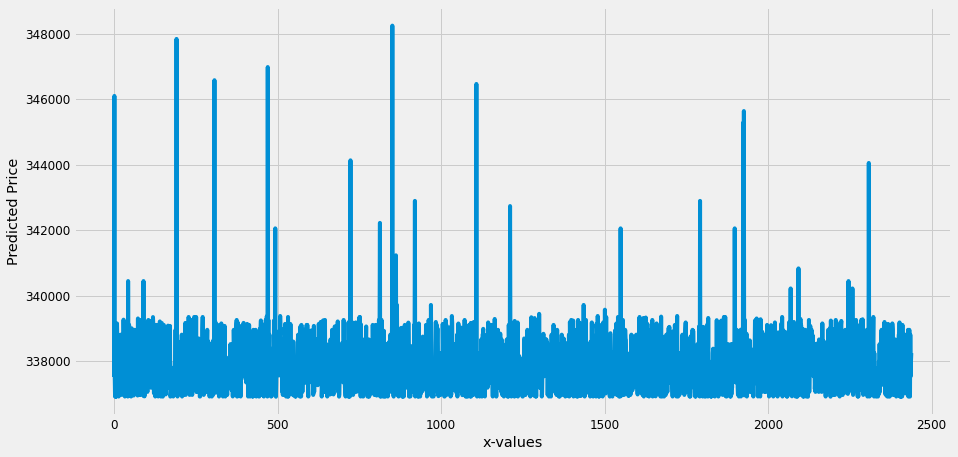

In [ ]:
plt.plot(result_df['Y SVR + K means'])
plt.xlabel("x-values")
plt.ylabel("Predicted Price")
plt.show()

#For The Results and futher details please see the detailed report.
#For Dataset Please see the appendex of the report
 

#The **END**
▶